In [6]:
#13. Tempereture observations have some gaps.
#a) Investigate the fraction of missing data
#b) Fill the gaps using different interpolation methods
#c) Investigate how different methods perform statistically and compare results visually
#Tip: Pandas interpolate, methods: ['linear', 'time', 'index', 'values', 'nearest', 'zero', 'slinear', 'quadratic', 
# 'cubic', 'barycentric', 'krogh', 'spline', 'polynomial', 'from_derivatives', 'piecewise_polynomial', 'pchip', 'akima', 
# 'cubicspline']
#Example: df3['column'].interpolate(method='cubicspline', limit=10)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Temperature_data_with_gaps.csv")
print(df.head(), '\n', df.tail())
print(df.info(),  '\n')

                  Time  Temperature
0  2021-01-01 00:00:00         -0.9
1  2021-01-01 01:00:00         -1.3
2  2021-01-01 02:00:00         -1.4
3  2021-01-01 03:00:00         -1.9
4  2021-01-01 04:00:00         -1.9 
                       Time  Temperature
23970  2023-09-26 19:00:00         12.8
23971  2023-09-26 20:00:00         12.1
23972  2023-09-26 21:00:00         11.0
23973  2023-09-26 22:00:00         10.9
23974  2023-09-26 23:00:00         10.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23975 entries, 0 to 23974
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         23975 non-null  object 
 1   Temperature  23217 non-null  float64
dtypes: float64(1), object(1)
memory usage: 374.7+ KB
None 



In [9]:
df.dtypes

Time            object
Temperature    float64
dtype: object

In [12]:
df['Time'] = pd.to_datetime(df['Time'])

In [13]:
#missing value percentage
df.isna().sum() / len(df) * 100

Time           0.000000
Temperature    3.161627
dtype: float64

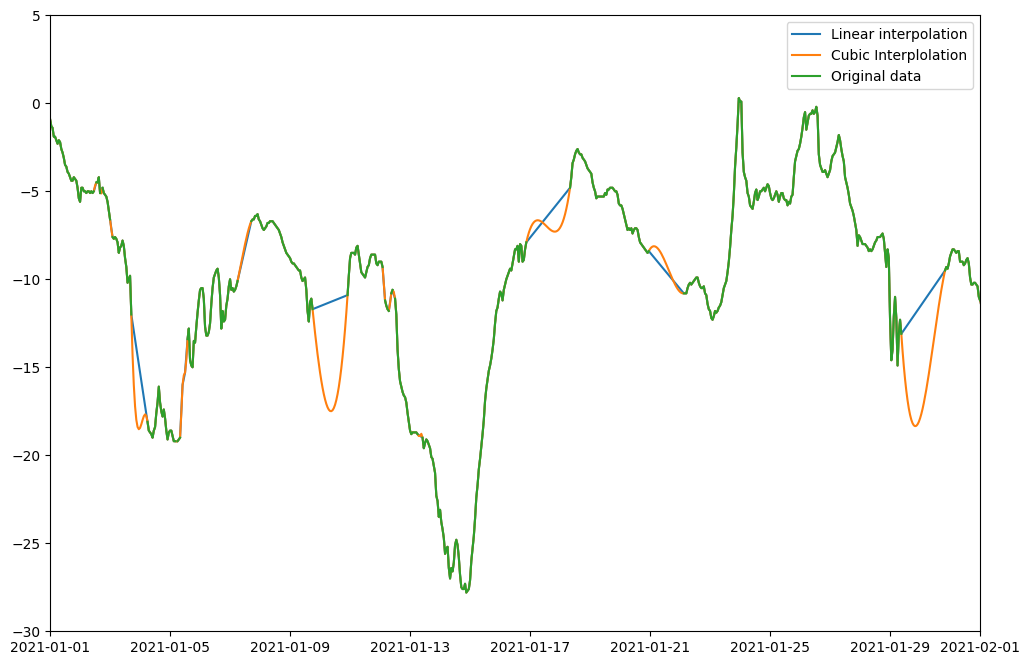

In [20]:
#Following example video
import datetime
plt.figure(figsize = (12,8))
plt.plot(df['Time'], df['Temperature'].interpolate(method='linear'))
plt.plot(df['Time'], df['Temperature'].interpolate(method='cubic'))
plt.plot(df['Time'], df['Temperature'])
plt.axis([datetime.date(2021,1,1), datetime.date(2021,2,1),-30,5])
plt.legend(['Linear interpolation','Cubic Interplolation','Original data'])


plt.show()

In [26]:
#statistical comparison
df_lim = df[:100]
methods = [
    "linear",
    "index",
    "values",
    "polynomial",
    "spline",
    "pchip",
    "akima",

    "pad",
    "ffill",
    "backfill",
    "bfill",
    "nearest"
]
print("Original data with gaps: Mean: ",df_lim['Temperature'].mean(), 'Max value: ', df_lim['Temperature'].max(), 'Min value ', df_lim['Temperature'].min())

#loop thru methods
for method in methods:
    if method in ['spline','polynomial']:
        interpolate_data = df_lim['Temperature'].interpolate(method = method, order = 3, limit = 5)
    else:
        interpolate_data = df_lim['Temperature'].interpolate(method = method, limit = 5)
    print(method, ' interpolation. Mean: ',interpolate_data.mean(),'Max value: ', interpolate_data.max(),'Min value ',interpolate_data.min())
      


Original data with gaps: Mean:  -8.620000000000001 Max value:  -0.9 Min value  -19.2
linear  interpolation. Mean:  -8.779983457402812 Max value:  -0.9 Min value  -19.2
index  interpolation. Mean:  -8.779983457402812 Max value:  -0.9 Min value  -19.2
values  interpolation. Mean:  -8.779983457402812 Max value:  -0.9 Min value  -19.2
polynomial  interpolation. Mean:  -8.96327655153286 Max value:  -0.9 Min value  -19.2
spline  interpolation. Mean:  -8.732198809376264 Max value:  -0.9 Min value  -19.2
pchip  interpolation. Mean:  -8.820571361729776 Max value:  -0.9 Min value  -19.2
akima  interpolation. Mean:  -8.780811861822594 Max value:  -0.9 Min value  -19.2
pad  interpolation. Mean:  -8.703225806451613 Max value:  -0.9 Min value  -19.2
ffill  interpolation. Mean:  -8.703225806451613 Max value:  -0.9 Min value  -19.2
backfill  interpolation. Mean:  -9.033333333333333 Max value:  -0.9 Min value  -19.2
bfill  interpolation. Mean:  -9.033333333333333 Max value:  -0.9 Min value  -19.2
neare

/tmp/ipykernel_77024/262769690.py:25: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolate_data = df_lim['Temperature'].interpolate(method = method, limit = 5)
/tmp/ipykernel_77024/262769690.py:25: FutureWarning: Series.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolate_data = df_lim['Temperature'].interpolate(method = method, limit = 5)
/tmp/ipykernel_77024/262769690.py:25: FutureWarning: Series.interpolate with method=backfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolate_data = df_lim['Temperature'].interpolate(method = method, limit = 5)
/tmp/ipykernel_77024/262769690.py:25: FutureWarning: Series.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolate_data = df_lim['T